In [1]:
import numpy as np

In [2]:
tensor_1d = np.array([1.3, 1, 4.0, 23.99])
print(tensor_1d)

[  1.3    1.     4.    23.99]


In [3]:
print(tensor_1d[0])

1.3


In [4]:
print(tensor_1d[2])

4.0


In [5]:
tensor_1d.ndim

1

In [6]:
tensor_1d.shape

(4,)

In [7]:
tensor_1d.dtype

dtype('float64')

In [8]:
import tensorflow as tf

In [9]:
tf_tensor=tf.convert_to_tensor(tensor_1d,dtype=tf.float64)
with tf.Session() as sess:
    print(sess.run(tf_tensor))
    print(sess.run(tf_tensor[0]))
    print(sess.run(tf_tensor[2]))

[  1.3    1.     4.    23.99]
1.3
4.0


In [10]:
import numpy as np

In [11]:
tensor_2d=np.array([(1,2,3,4),(4,5,6,7),(8,9,10,11),(12,13,14,15)])
print(tensor_2d)

[[ 1  2  3  4]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [12]:
tensor_2d[3][3]

15

In [13]:
tensor_2d[0:2,0:2]

array([[1, 2],
       [4, 5]])

In [14]:
import tensorflow as tf
import numpy as np

In [15]:
matrix1 = np.array([(2,2,2),(2,2,2),(2,2,2)],dtype='int32')
matrix2 = np.array([(1,1,1),(1,1,1),(1,1,1)],dtype='int32')

In [16]:
print("matrix1 =")
print(matrix1)
print("matrix2 =")
print(matrix2)

matrix1 =
[[2 2 2]
 [2 2 2]
 [2 2 2]]
matrix2 =
[[1 1 1]
 [1 1 1]
 [1 1 1]]


In [17]:
matrix1 = tf.constant(matrix1)
matrix2 = tf.constant(matrix2)

In [18]:
matrix_product = tf.matmul(matrix1, matrix2)
matrix_sum = tf.add(matrix1,matrix2)
matrix_3 = np.array([(2,7,2),(1,4,2),(9,0,2)],dtype='float32')

In [19]:
print("matrix3 =")
print(matrix_3)

matrix3 =
[[ 2.  7.  2.]
 [ 1.  4.  2.]
 [ 9.  0.  2.]]


In [20]:
matrix_det = tf.matrix_determinant(matrix_3)

In [21]:
with tf.Session() as sess:
    result1 = sess.run(matrix_product)
    result2 = sess.run(matrix_sum)
    result3 = sess.run(matrix_det)

In [22]:
print("matrix1*matrix2 =")
print(result1)
print("matrix1 + matrix2 =")
print(result2)
print("matrix3 determinant result =")
print(result3)

matrix1*matrix2 =
[[6 6 6]
 [6 6 6]
 [6 6 6]]
matrix1 + matrix2 =
[[3 3 3]
 [3 3 3]
 [3 3 3]]
matrix3 determinant result =
56.0


In [23]:
test = tf.sin(matrix_3)
with tf.Session() as sess:
    result = sess.run(test)
print(result)

[[ 0.90929741  0.65698659  0.90929741]
 [ 0.84147096 -0.7568025   0.90929741]
 [ 0.41211849  0.          0.90929741]]


In [24]:
import numpy as np

In [25]:
tensor_3d = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
print(tensor_3d)

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


In [26]:
tensor_3d.shape

(2, 2, 2)

In [27]:
tensor_3d[0,0,0]

1

In [28]:
tensor_3d[0,0,1]

2

In [29]:
tensor_3d[0,1,0]

3

In [30]:
tensor_3d[0,1,1]

4

In [31]:
import matplotlib.image as mp_image
filename = "packt.jpeg"

In [32]:
input_image = mp_image.imread(filename)

In [33]:
print('input dim = {}'.format(input_image.ndim))
print('input shape = {}'.format(input_image.shape))

input dim = 3
input shape = (80, 144, 3)


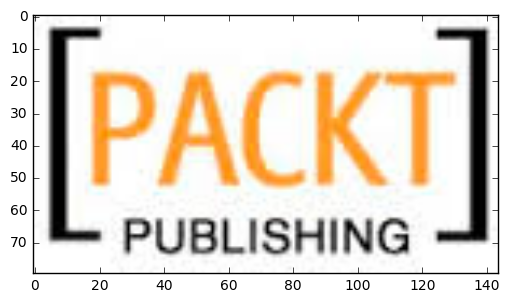

In [34]:
import matplotlib.pyplot as plt
plt.imshow(input_image)
plt.show()

In [35]:
import tensorflow as tf
my_image = tf.placeholder("uint8",[None,None,3])

In [36]:
slice = tf.slice(my_image,[10,0,0],[16,-1,-1])

(16, 144, 3)


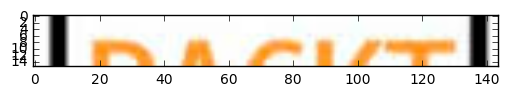

In [37]:
with tf.Session() as session:
    result = session.run(slice,feed_dict={my_image: input_image})
    print(result.shape)
    
plt.imshow(result)
plt.show()

In [38]:
import tensorflow as tf
x = tf.Variable(input_image,name='x')
model = tf.global_variables_initializer()
with tf.Session() as session:
    x = tf.transpose(x, perm=[1,0,2])
    session.run(model)
    result=session.run(x)

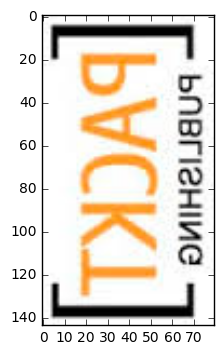

In [39]:
plt.imshow(result)
plt.show()

In [40]:
x = 5.+4j
x = complex(5,4)
x

(5+4j)

In [41]:
x.real

5.0

In [42]:
x.imag

4.0

In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [44]:
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y
c = tf.constant(Z.astype(np.complex64))

In [45]:
zs = tf.Variable(c)
ns = tf.Variable(tf.zeros_like(c, tf.float32))

In [46]:
sess = tf.InteractiveSession()

In [47]:
tf.global_variables_initializer().run()

In [48]:
zs_ = zs*zs + c
not_diverged = tf.abs(zs_) < 4
step = tf.group(zs.assign(zs_), ns.assign_add(tf.cast(not_diverged, tf.float32)))

In [49]:
for i in range(200): step.run()

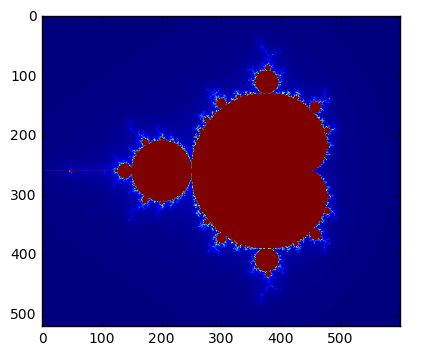

In [50]:
plt.imshow(ns.eval())
plt.show()

In [51]:
Y, X = np.mgrid[-2:2:0.005, -2:2:0.005]
Z = X+1j*Y
Z = tf.constant(Z.astype("complex64"))

In [52]:
zs = tf.Variable(Z)
ns = tf.Variable(tf.zeros_like(Z, "float32"))

In [53]:
tf.InteractiveSession()

In [54]:
tf.global_variables_initializer().run()

In [55]:
c = complex(0.0,0.75)
zs_ = zs*zs - c

In [56]:
not_diverged = tf.abs(zs_) < 4
step = tf.group(zs.assign(zs_), ns.assign_add(tf.cast(not_diverged, "float32")))

In [57]:
for i in range(200): step.run()

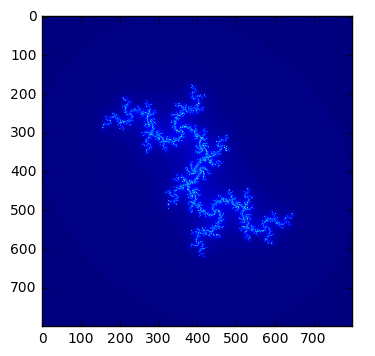

In [58]:
plt.imshow(ns.eval())
plt.show()

In [59]:
import tensorflow as tf

In [60]:
x = tf.placeholder(tf.float32)
y = 2*x*x

In [61]:
var_grad = tf.gradients(y, x)

In [62]:
with tf.Session() as session:
    var_grad_val = session.run(var_grad,feed_dict={x:1})

In [63]:
print(var_grad_val)

[4.0]


In [64]:
import tensorflow as tf

In [65]:
uniform = tf.random_uniform([100],minval=0,maxval=1,dtype=tf.float32)
sess = tf.Session()

[ 0.710572    0.71104121  0.83870769  0.70373905  0.77796948  0.61589503
  0.62249696  0.94749331  0.29434443  0.29388309  0.86225688  0.15698779
  0.89229858  0.84256947  0.38817048  0.66453671  0.13542199  0.37619591
  0.41182661  0.79613078  0.66748726  0.00994515  0.30331039  0.12894118
  0.67174935  0.00199771  0.20154905  0.28685474  0.52052939  0.26191294
  0.24400318  0.25362647  0.12944973  0.2335608   0.23578107  0.35572445
  0.34133041  0.13707805  0.65406704  0.53344572  0.1150912   0.59993386
  0.07493043  0.42859197  0.01908052  0.54688847  0.49049926  0.37383115
  0.38809037  0.82292616  0.81015384  0.3120991   0.8200109   0.56342864
  0.06154203  0.47706318  0.97833467  0.08704114  0.35550094  0.77586055
  0.52227545  0.62460959  0.42495728  0.36710107  0.77829087  0.56243682
  0.85613406  0.90875006  0.30964601  0.15018177  0.46933794  0.84190726
  0.26877916  0.83559918  0.30390954  0.7717104   0.43063974  0.16672051
  0.16378713  0.54723454  0.34079206  0.1026907   0

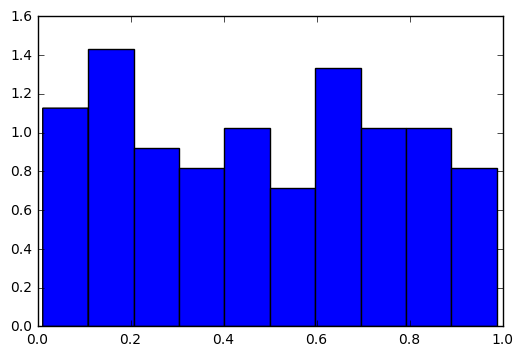

In [66]:
with tf.Session() as session:
    print(uniform.eval())
    plt.hist(uniform.eval(),normed=True)
    plt.show()

In [67]:
import tensorflow as tf
import matplotlib.pyplot as plt

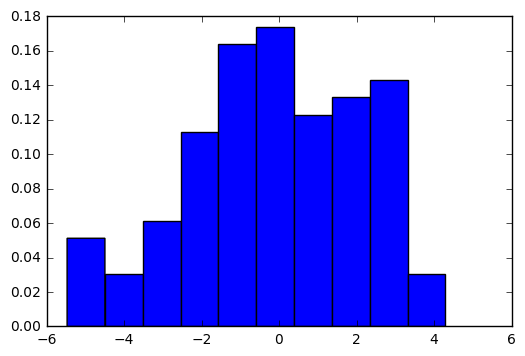

In [68]:
norm = tf.random_normal([100], mean=0, stddev=2)
with tf.Session() as session:
    plt.hist(norm.eval(),normed=True)
    plt.show()

In [69]:
uniform_with_seed = tf.random_uniform([1], seed=1)
uniform_without_seed = tf.random_uniform([1])

In [70]:
print("First Run")
with tf.Session() as first_session:
    print("uniform with (seed = 1) = {}".format(first_session.run(uniform_with_seed)))
    print("uniform with (seed = 1) = {}".format(first_session.run(uniform_with_seed)))
    print("uniform without seed = {}".format(first_session.run(uniform_without_seed)))
    print("uniform without seed = {}".format(first_session.run(uniform_without_seed)))

print("Second Run")
with tf.Session() as second_session:
    print("uniform with (seed = 1) = {}".format(second_session.run(uniform_with_seed)))
    print("uniform with (seed = 1) = {}".format(second_session.run(uniform_with_seed)))
    print("uniform without seed = {}".format(second_session.run(uniform_without_seed)))
    print("uniform without seed = {}".format(second_session.run(uniform_without_seed)))

First Run
uniform with (seed = 1) = [ 0.23903739]
uniform with (seed = 1) = [ 0.22267115]
uniform without seed = [ 0.24685669]
uniform without seed = [ 0.96162617]
Second Run
uniform with (seed = 1) = [ 0.23903739]
uniform with (seed = 1) = [ 0.22267115]
uniform without seed = [ 0.7163142]
uniform without seed = [ 0.27156734]


In [71]:
import tensorflow as tf

In [72]:
trials = 100
hits = 0

x = tf.random_uniform([1],minval=-1,maxval=1,dtype=tf.float32)
y = tf.random_uniform([1],minval=-1,maxval=1,dtype=tf.float32)
pi = []

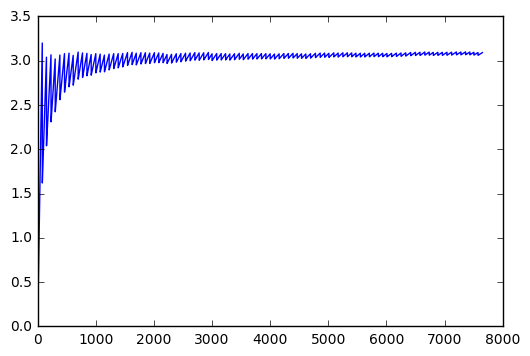

In [73]:
sess = tf.Session()

with sess.as_default():
    for i in range(1,trials):
        for j in range(1,trials):
            if x.eval()**2 + y.eval()**2 < 1 :
                hits = hits + 1
                pi.append((4 * float(hits) / i)/trials)
                
plt.plot(pi)
plt.show()

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
N = 500
u_init = np.zeros([N, N], dtype=np.float32)
for n in range(40):
    a,b = np.random.randint(0, N, 2)
    u_init[a,b] = np.random.uniform()

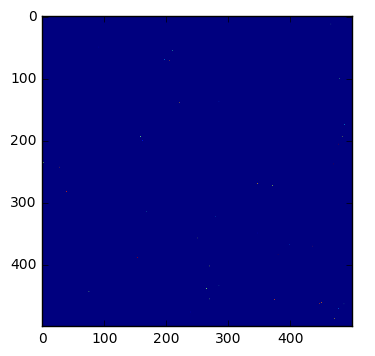

In [5]:
plt.imshow(u_init)
plt.show()

In [6]:
tf.InteractiveSession()

ut_init = np.zeros([N, N], dtype=np.float32)
eps = tf.placeholder(tf.float32, shape=())
damping = tf.placeholder(tf.float32, shape=())

U = tf.Variable(u_init)
Ut = tf.Variable(ut_init)

In [7]:
def make_kernel(a):
    a = np.asarray(a)
    a = a.reshape(list(a.shape) + [1,1])
    return tf.constant(a, dtype=1)

def simple_conv(x, k):
    x = tf.expand_dims(tf.expand_dims(x, 0), -1)
    y = tf.nn.depthwise_conv2d(x, k, [1, 1, 1, 1],padding='SAME')
    return y[0, :, :, 0]

def laplace(x):
    laplace_k = make_kernel([[0.5, 1.0, 0.5], [1.0, -6., 1.0], [0.5, 1.0, 0.5]])
    return simple_conv(x, laplace_k)

In [8]:
U_ = U + eps * Ut
Ut_ = Ut + eps * (laplace(U) - damping * Ut)

step = tf.group(U.assign(U_),Ut.assign(Ut_))

In [9]:
tf.global_variables_initializer().run()

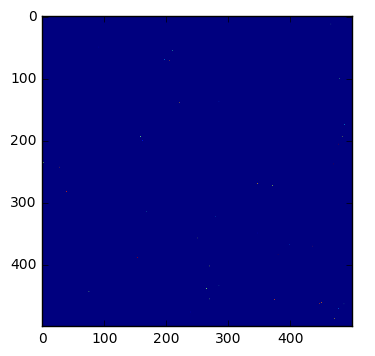

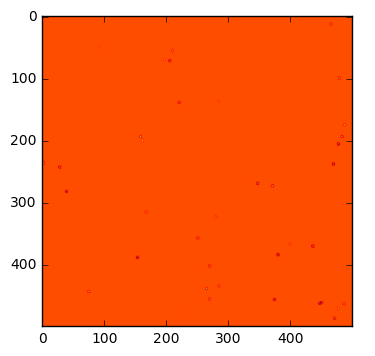

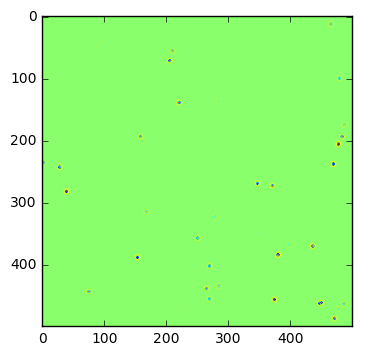

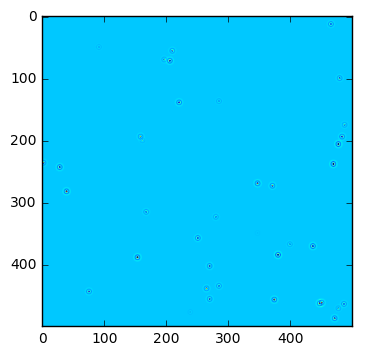

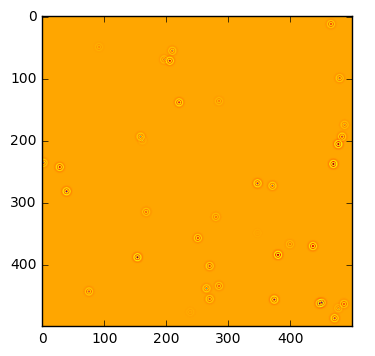

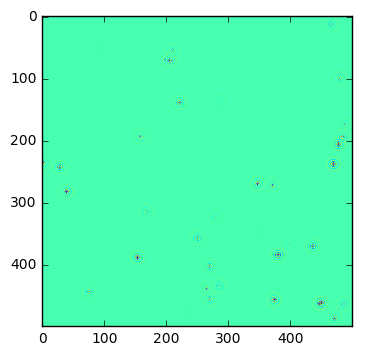

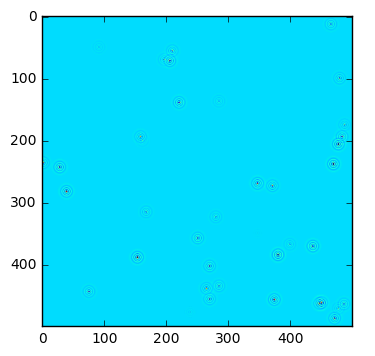

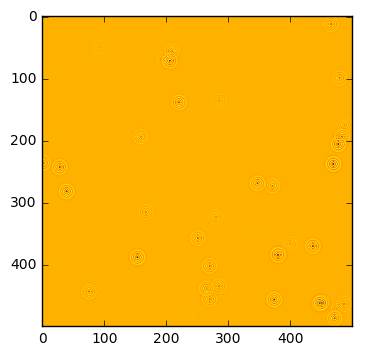

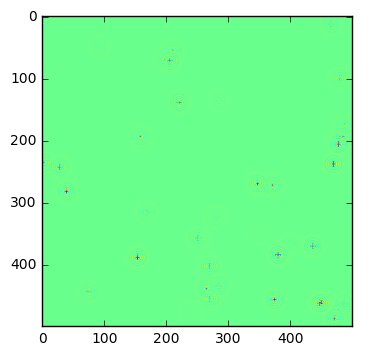

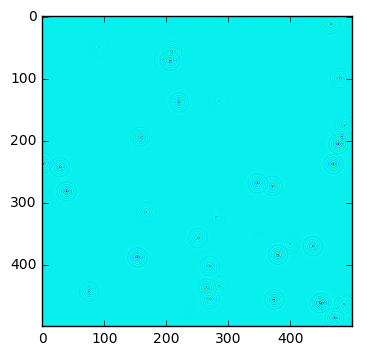

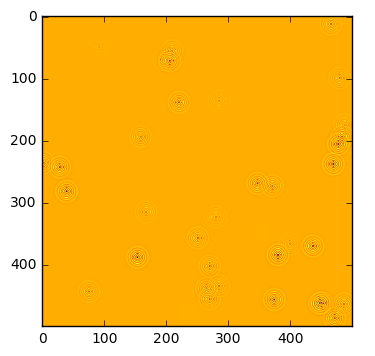

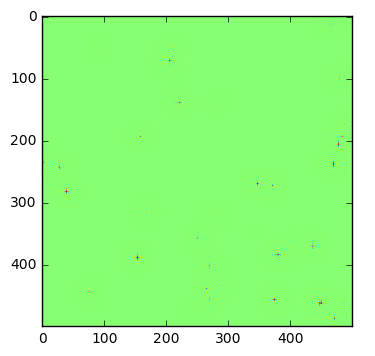

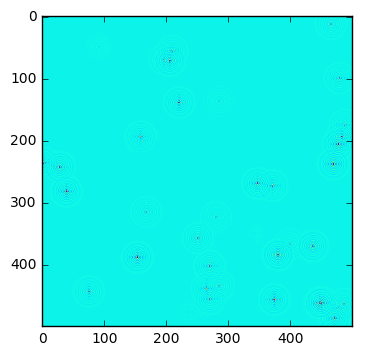

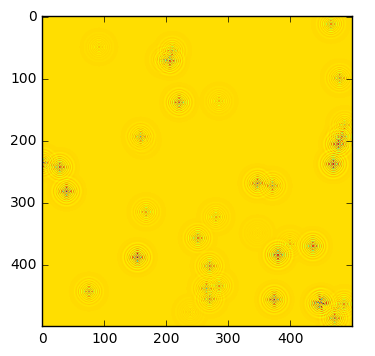

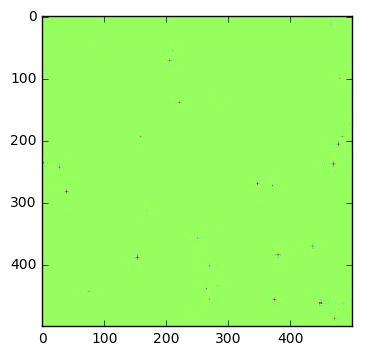

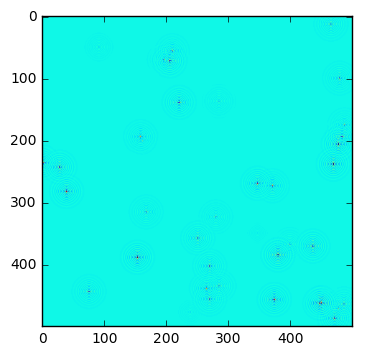

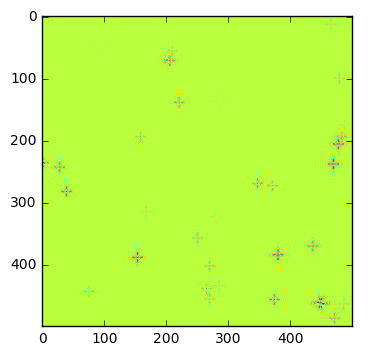

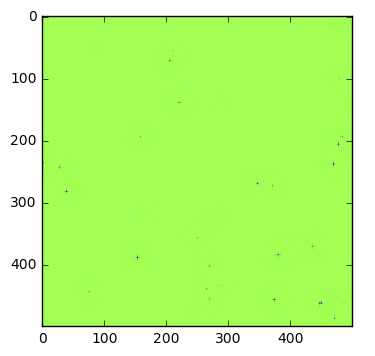

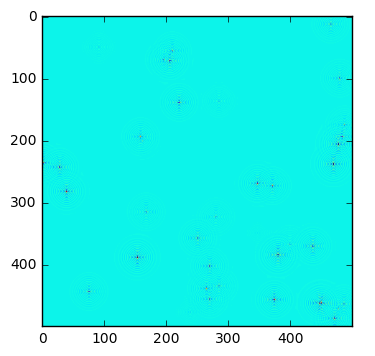

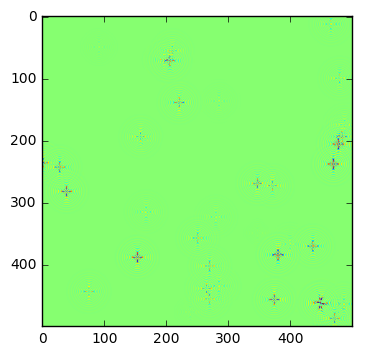

In [10]:
for i in range(1000):
    step.run({eps: 0.03, damping: 0.04})
    if i % 50 == 0:
        plt.imshow(U.eval())
        plt.show()